In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

In [3]:
print("Train Shape:", train.shape)
print(train.head())

Train Shape: (421570, 5)
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [4]:
print("\nFeatures Shape:", features.shape)
print(features.head())


Features Shape: (8190, 12)
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [5]:
print("\nStores Shape:", stores.shape)
print(stores.head())


Stores Shape: (45, 3)
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [6]:
print("Missing values in train:\n", train.isnull().sum())
print("\nMissing values in features:\n", features.isnull().sum())
print("\nMissing values in stores:\n", stores.isnull().sum())

Missing values in train:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Missing values in features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in stores:
 Store    0
Type     0
Size     0
dtype: int64


In [7]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features[markdown_cols] = features[markdown_cols].fillna(0)

In [9]:
# Sort by Store and Date to maintain time order
features = features.sort_values(['Store', 'Date'])

# Forward fill CPI and Unemployment per Store
features[['CPI', 'Unemployment']] = features.groupby('Store')[['CPI', 'Unemployment']].ffill().bfill()

In [10]:
print("Missing values after cleaning:\n", features.isnull().sum())


Missing values after cleaning:
 Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [12]:
print("Train Description:")
print(train.describe())

print("\nFeatures Description:")
print(features.describe())


Train Description:
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

Features Description:
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    8190.000000    8190.000000   
mean     23.000000    59.356198     3.405992    3462.090725    1206.981664   
std      12.987966    18.678607     0.431337    7388.916286    5495.556015   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000       0.000000       0.000000   
50%      23.000000    60.710000

In [13]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])


In [14]:
# Merge train with features and stores
data = pd.merge(train, features, on=["Store", "Date"], how='left')
data = pd.merge(data, stores, on="Store", how='left')

print("Merged Data Shape:", data.shape)
data.head()


Merged Data Shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


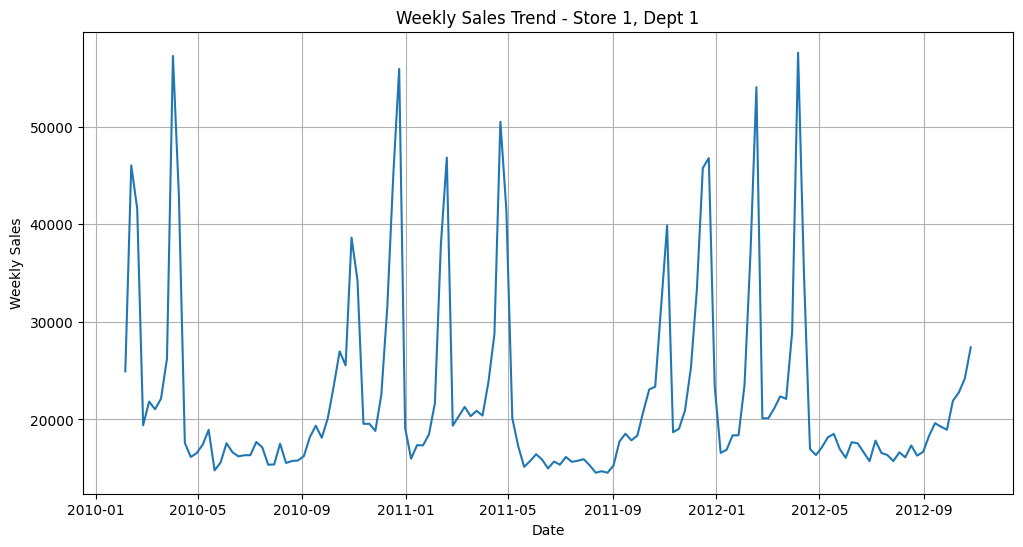

In [15]:
# Example: Sales trend for one store and department
sample = data[(data['Store'] == 1) & (data['Dept'] == 1)]
sample = sample.sort_values("Date")

plt.figure(figsize=(12, 6))
plt.plot(sample['Date'], sample['Weekly_Sales'])
plt.title('Weekly Sales Trend - Store 1, Dept 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week


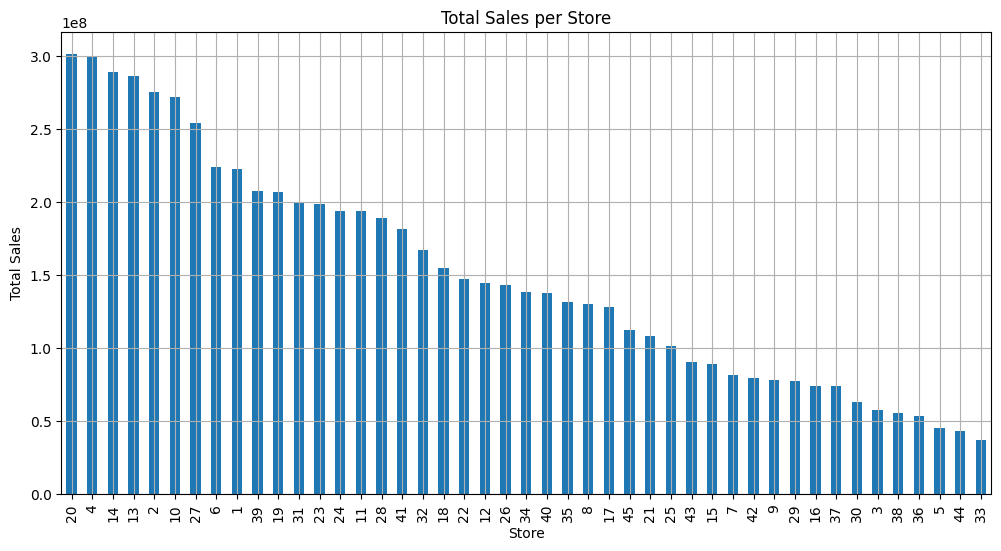

In [17]:
sales_per_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_per_store.plot(kind='bar')
plt.title('Total Sales per Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


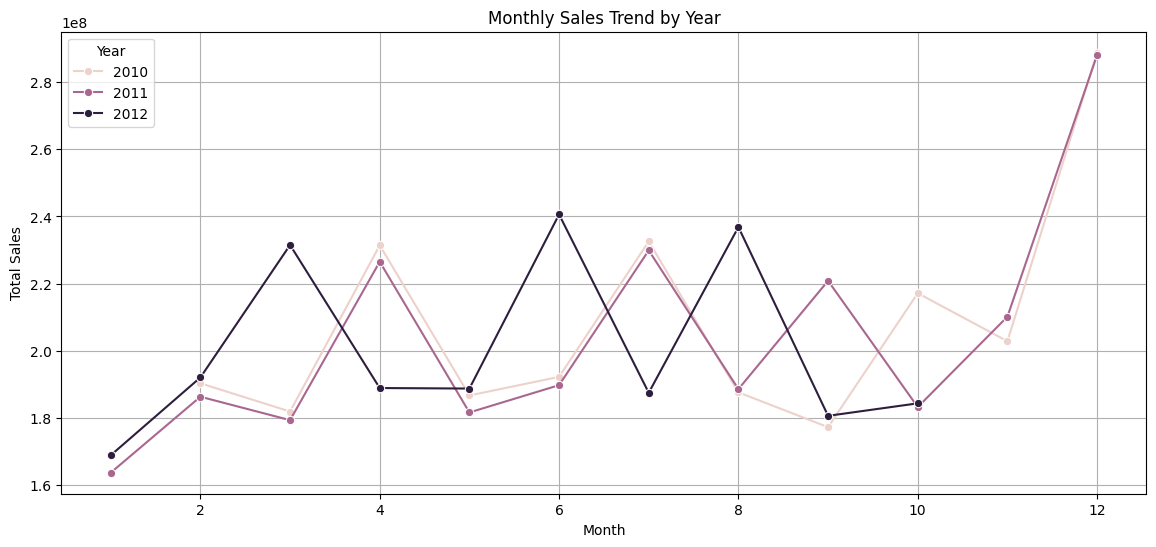

In [18]:
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


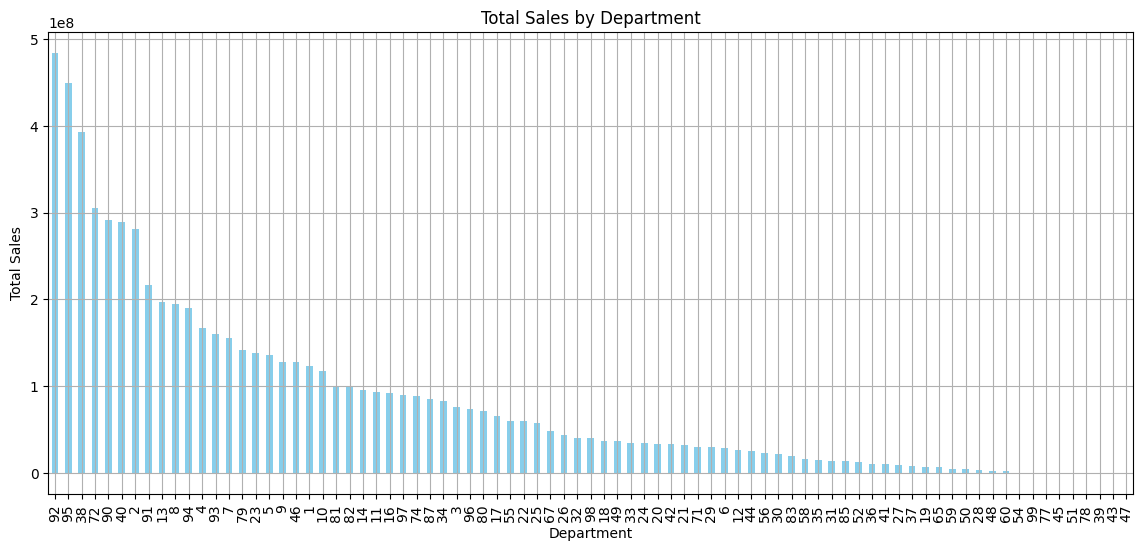

In [19]:
dept_sales = data.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
dept_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


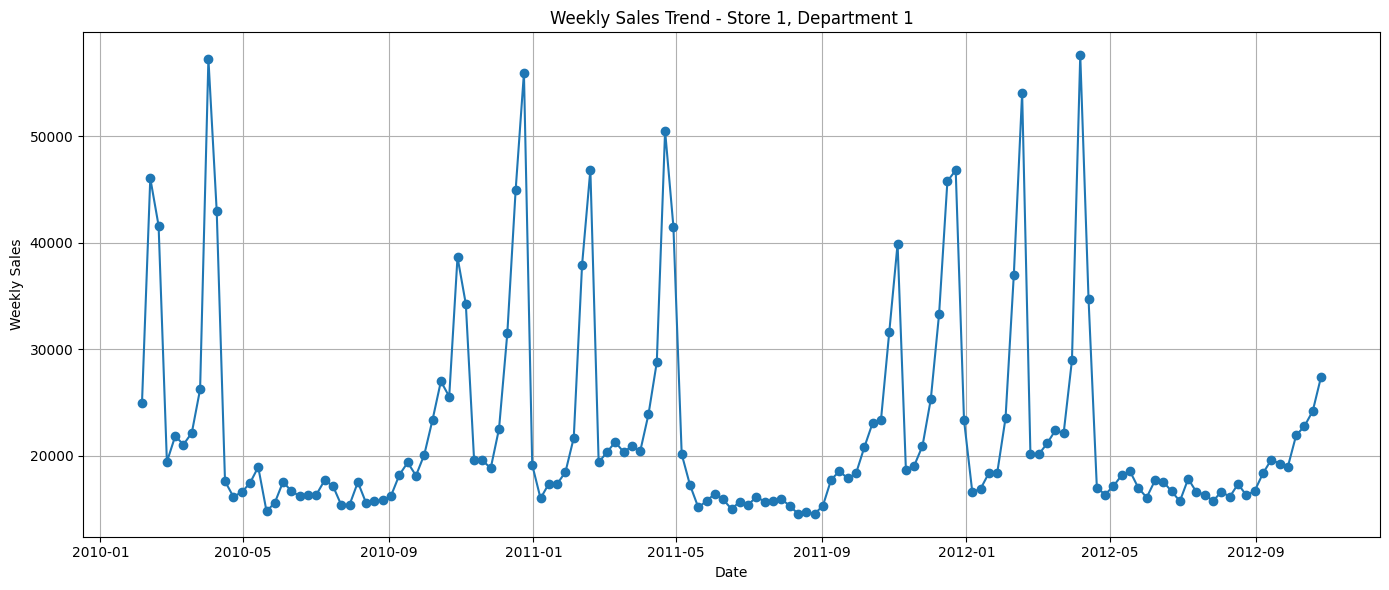

In [20]:
# Filter data
store_dept_sales = data[(data['Store'] == 1) & (data['Dept'] == 1)]
store_dept_sales = store_dept_sales.sort_values('Date')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(store_dept_sales['Date'], store_dept_sales['Weekly_Sales'], marker='o')
plt.title('Weekly Sales Trend - Store 1, Department 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


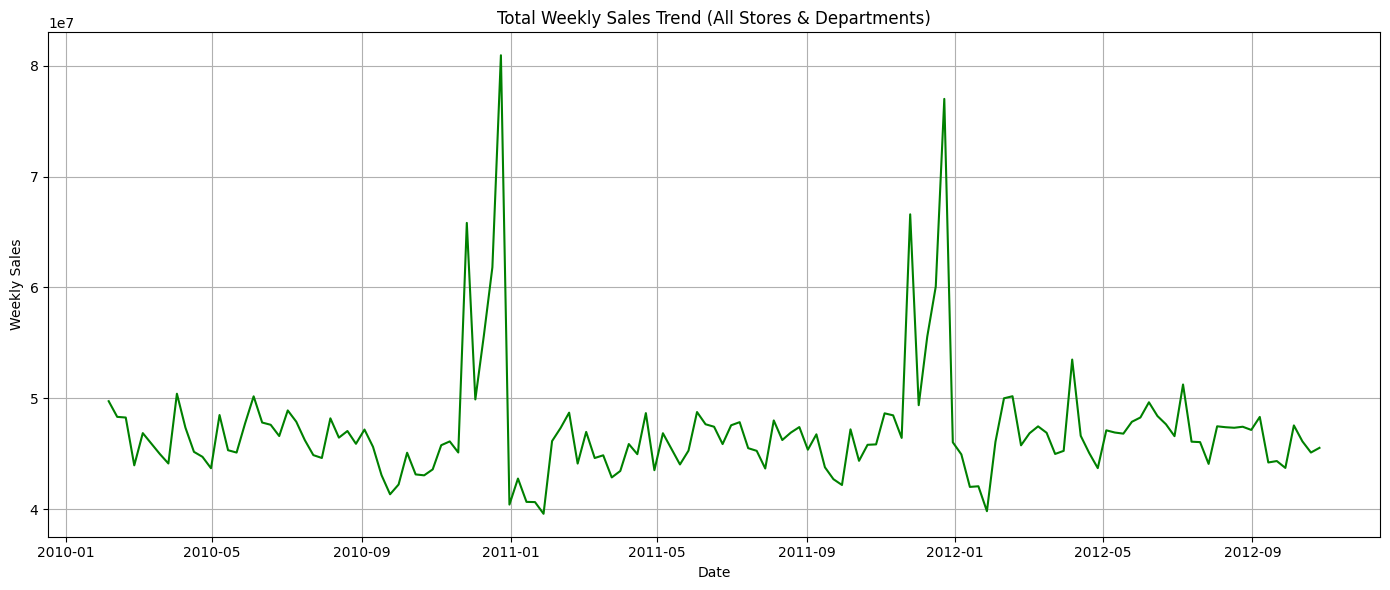

In [21]:
overall_weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(overall_weekly_sales['Date'], overall_weekly_sales['Weekly_Sales'], color='green')
plt.title('Total Weekly Sales Trend (All Stores & Departments)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Filter data
new_data = data[(data['Store'] == 1) & (data['Dept'] == 1)]

# Sort and group by Date (aggregate sales per week)
ts = new_data.groupby('Date')['Weekly_Sales'].sum().sort_index()


In [24]:
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Series is NOT stationary – differencing needed.")
else:
    print("Series is stationary – no differencing needed.")


ADF Statistic: -2.52216386865004
p-value: 0.11017432282586925
Series is NOT stationary – differencing needed.


In [25]:
ts_diff = ts.diff().dropna()

# Re-run ADF test
result_diff = adfuller(ts_diff)
print("After differencing - p-value:", result_diff[1])


After differencing - p-value: 5.2699344458886327e-20


In [26]:
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1482.653
Date:                Thu, 03 Jul 2025   AIC                           2971.305
Time:                        23:07:34   BIC                           2980.173
Sample:                    02-05-2010   HQIC                          2974.909
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5749      0.045     12.647      0.000       0.486       0.664
ma.L1         -1.0000      0.070    -14.302      0.000      -1.137      -0.863
sigma2      6.699e+07   1.04e-09   6.42e+16      0.0

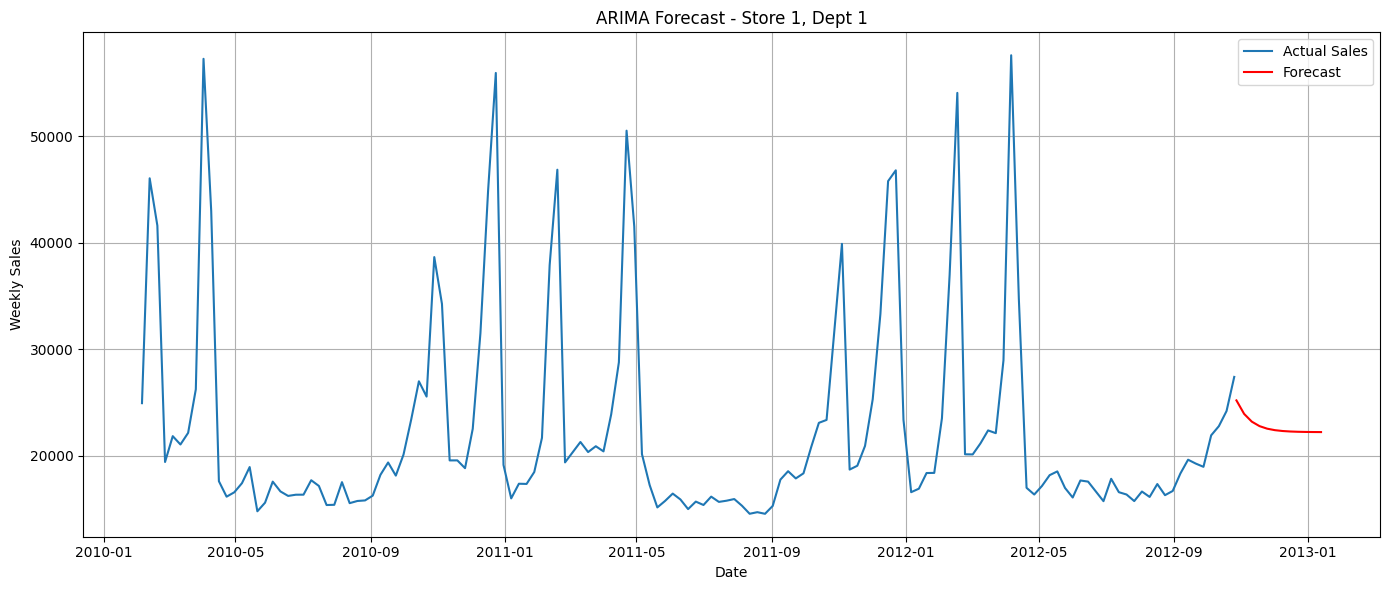

In [27]:
# Forecast next 12 weeks
forecast = model_fit.forecast(steps=12)

# Plot actual + forecast
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Actual Sales')
plt.plot(pd.date_range(ts.index[-1], periods=12, freq='W'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast - Store 1, Dept 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Load test dataset
test = pd.read_csv("test.csv")
test['Date'] = pd.to_datetime(test['Date'])

# Filter for Store 1, Dept 1 (same as trained model)
test_filtered = test[(test['Store'] == 1) & (test['Dept'] == 1)].sort_values('Date')


In [31]:
# Use Store 1, Dept 1 again
ts = data[(data['Store'] == 1) & (data['Dept'] == 1)]
ts = ts.groupby('Date')['Weekly_Sales'].sum().sort_index()

# Use last 12 weeks as test, rest as train
train_ts = ts[:-12]
test_ts = ts[-12:]



In [33]:
model = ARIMA(train_ts, order=(1, 1, 1))
model_fit = model.fit()

In [34]:
forecast = model_fit.forecast(steps=12)

# Align forecast with test dates
forecast.index = test_ts.index

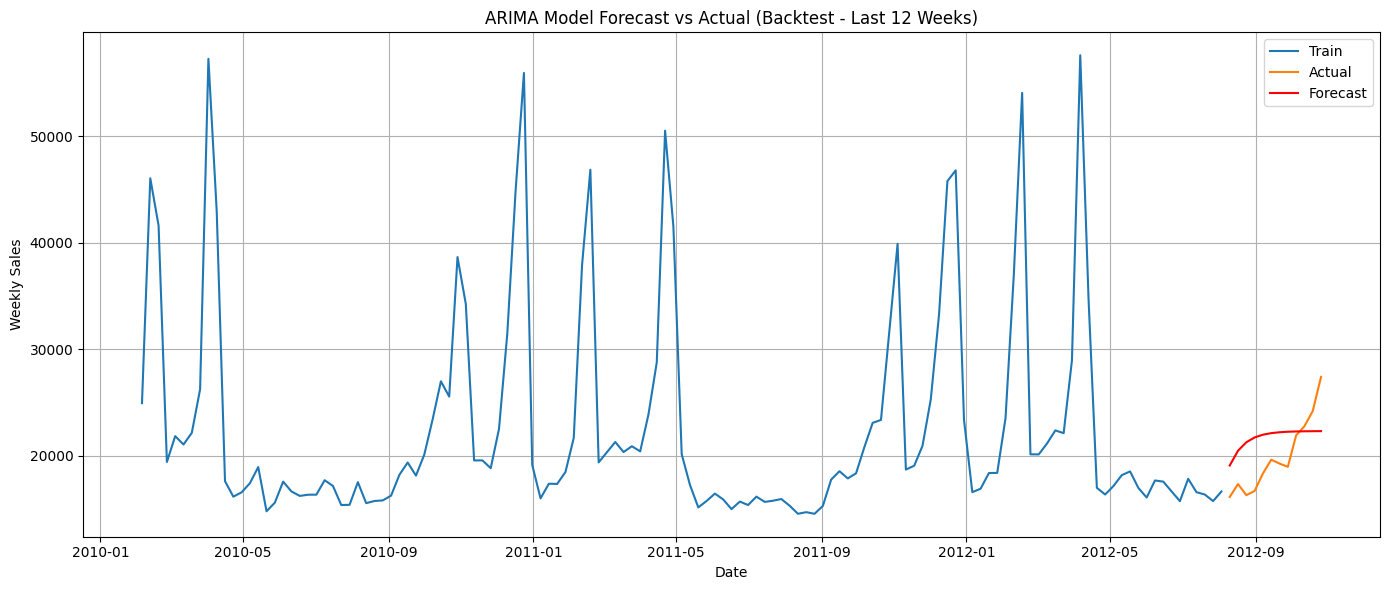

In [35]:
plt.figure(figsize=(14, 6))
plt.plot(train_ts.index, train_ts, label='Train')
plt.plot(test_ts.index, test_ts, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual (Backtest - Last 12 Weeks)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_ts, forecast)
rmse = np.sqrt(mean_squared_error(test_ts, forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 3022.90
RMSE: 3382.63


In [40]:
# Create a working DataFrame
df = data.copy()

# Create time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Encode IsHoliday
df['IsHoliday_x'] = df['IsHoliday_x'].astype(int)

# Target
y = df['Weekly_Sales']

# Select useful features
features = [
    'Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'Type', 'Size', 'IsHoliday_x', 'Year', 'Month', 'Week'
]

# Convert categorical 'Type' to numeric
df['Type'] = df['Type'].map({'A': 0, 'B': 1, 'C': 2})

X = df[features]


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_val)

# Metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1445.16
RMSE: 3666.87


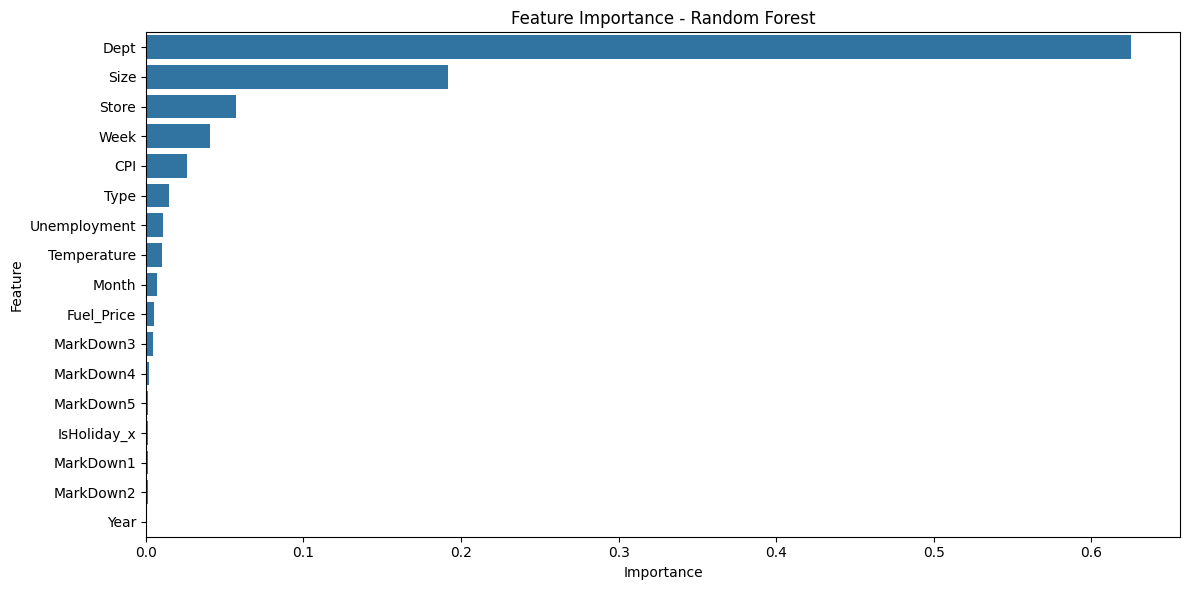

In [43]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [44]:
top_features = feature_importance_df['Feature'].head(8).tolist()

# Re-train with top features
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]

rf_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train)
y_pred_top = rf_top.predict(X_val_top)

# Metrics
mae_top = mean_absolute_error(y_val, y_pred_top)
rmse_top = np.sqrt(mean_squared_error(y_val, y_pred_top))

print(f"[Optimized] MAE: {mae_top:.2f}")
print(f"[Optimized] RMSE: {rmse_top:.2f}")


[Optimized] MAE: 1446.05
[Optimized] RMSE: 3649.79


In [45]:
# Assume you’ve cleaned and prepared `df` with feature columns and target `y`
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)  # Train on full available data


RandomForestRegressor(random_state=42)

In [46]:
# Get unique stores and departments
stores = df['Store'].unique()
depts = df['Dept'].unique()

# Simulate weekly dates (next year)
future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(weeks=1), periods=52, freq='W')

# Build future prediction DataFrame
future_data = []

for store in stores:
    for dept in depts:
        for date in future_dates:
            future_data.append({'Store': store, 'Dept': dept, 'Date': date})

future_df = pd.DataFrame(future_data)


In [49]:
# Load original supporting data
features = pd.read_csv("features.csv")
stores_info = pd.read_csv("stores.csv")
features['Date'] = pd.to_datetime(features['Date'])

# Merge features and store info
future_df = pd.merge(future_df, features, on=['Store', 'Date'], how='left')
future_df = pd.merge(future_df, stores_info, on='Store', how='left')

# Fill missing markdowns as 0 (likely for future)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    if col in future_df.columns:
        future_df[col] = future_df[col].fillna(0)

# Fill economic indicators
future_df = future_df.sort_values(['Store', 'Date'])
future_df[['CPI', 'Unemployment']] = future_df.groupby('Store')[['CPI', 'Unemployment']].ffill().bfill()

# Add CPI and Unemployment if missing after merge
if 'CPI' not in future_df.columns:
    future_df['CPI'] = np.nan
if 'Unemployment' not in future_df.columns:
    future_df['Unemployment'] = np.nan

# Fill them using forward/backward fill per Store (or global median fallback)
future_df = future_df.sort_values(['Store', 'Date'])
future_df[['CPI', 'Unemployment']] = (
    future_df.groupby('Store')[['CPI', 'Unemployment']].ffill().bfill()
)

# If still missing (e.g., entire store missing values), fill with median
future_df['CPI'] = future_df['CPI'].fillna(df['CPI'].median())
future_df['Unemployment'] = future_df['Unemployment'].fillna(df['Unemployment'].median())


# Encode 'Type'
future_df['Type'] = future_df['Type'].map({'A': 0, 'B': 1, 'C': 2})

# Time features
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Week'] = future_df['Date'].dt.isocalendar().week.astype(int)

# Fill missing values in IsHoliday with 0 (not a holiday)
future_df['IsHoliday'] = future_df['IsHoliday'].fillna(0).astype(int)


# Encode holiday flag
future_df['IsHoliday'] = future_df['IsHoliday'].astype(int)


In [51]:
print(type(features))
print(features)


<class 'pandas.core.frame.DataFrame'>
      Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-02-05        42.31       2.572        NaN        NaN   
1         1 2010-02-12        38.51       2.548        NaN        NaN   
2         1 2010-02-19        39.93       2.514        NaN        NaN   
3         1 2010-02-26        46.63       2.561        NaN        NaN   
4         1 2010-03-05        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45 2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0       

In [54]:
# Redefine features correctly
features = [
    'Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'Type', 'Size', 'IsHoliday_x', 'Year', 'Month', 'Week'
]


In [55]:
future_X = future_df[features]
future_df['Predicted_Sales'] = rf_model.predict(future_X)


In [56]:
# Example: Total predicted sales for next year
predicted_total = future_df['Predicted_Sales'].sum()
print(f"Predicted Total Sales for Next Year: {predicted_total:.2f}")

# Save to CSV
future_df[['Store', 'Dept', 'Date', 'Predicted_Sales']].to_csv("next_year_sales_predictions.csv", index=False)


Predicted Total Sales for Next Year: 2635818517.51
